#다크넷으로 학습시킨 yolov2-tiny 모델의 weights 파일을 플러터에서 사용하기 위해 변환하는 과정
.weights -> .pb -> .tflite 순으로 변환한다.

#1.기본 세팅하기
----

In [ ]:
#구글 코랩은 텐서플로 2.x 버전이어서 1.15 버전으로 다시 설치한다. 코드 실행하면 Proceed (y/n)? 라고 물으면 y 입력해주기
!pip uninstall tensorflow
!pip install tensorflow==1.15

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.0
     |████████████████████████████████| 412.3 MB 26 kB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 503 kB 70.9 MB/s 
     |████████████████████████████████| 3.8 MB 55.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=097b09c0e7d4507dfde7e3e139b7ee9c5208c3d072321c76ceed2115ff68b321
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32

In [ ]:
# 필요한 라이브러리들 설치
!apt-get update
!pip3 install numpy
!apt-get install python-opencv -y
!pip install cython

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [80.8 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [950 kB]
Get:13 http

#2.darkflow 설치하기 
----
darkflow는 darknet으로 학습시켜 나온 weight값을 pb로 바꿔주는 기능을 제공한다.

셀 실행 후 왼쪽 폴더에 darkflow 폴더가 생성된다.

In [ ]:
# Clean up the directory
%cd /content/
%rm -rf darkflow
# Clone the darkflow repository
!git clone https://github.com/thtrieu/darkflow
# Change into the darkflow dir and install darkflow with pip
%cd darkflow
!python setup.py build_ext --inplace

/content
Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2709
Receiving objects: 100% (2713/2713), 32.98 MiB | 21.66 MiB/s, done.
Resolving deltas: 100% (1761/1761), done.
/content/darkflow
setup.py:6: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkf

In [ ]:
#이거를 해줘야 변환할때 에러가 안 난다.
%cd /content/darkflow
!sed -i "s/self.offset = 16/self.offset = 20/g"  ./darkflow/utils/loader.py

/content/darkflow


# 3.변환할 weights파일, cfg파일 불러오기
-----
다크넷에서 학습시킬때 썼던 .cfg 파일과 학습결과로 나온 .weights 파일을 불러온다.
작성자는 구글드라이브에 파일을 저장되어있어서 구글드라이브와 연결했다.

In [ ]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 4.weights -> pb 변환
---
##4-1.라벨 수정해주기 (직접수정)
darkflow 폴더안에 label.txt를 찾아서 본인 모델에 맞게 클래스들을 수정해주기

ex)

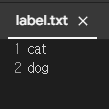
##4-2.변환하기
!./flow --model cfg파일경로 --load weights파일경로 --savepb

- cfg 파일, weights 파일 경로 잘 입력해주세요

- 셀 실행 후 built_graph 폴더안에 .pb 와 .meta 파일이 생성되면 성공


In [ ]:
%cd /content/darkflow
%mkdir built_graph
!./flow --model /content/drive/MyDrive/yolov2/yolov2-tiny.cfg --load /content/drive/MyDrive/yolov2/yolov2-tiny_last.weights --savepb

/content/darkflow
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.










/content/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2-tiny_last.cfg not found, use /content/drive/MyDrive/yolov3/yolov2-tiny.cfg instead
  cfg_path, FLAGS.model))
Parsing /content/drive/MyDrive/yolov3/yolov2-tiny.cfg
Loading /content/drive/MyDrive/yolov3/yolov2-tiny_last.weights ...
Successfully identified 44148320 bytes
Finished in 0.7063376903533936s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Load  |  

#5.pb -> tflite 변환
---

In [ ]:
#변환 코드 다운
!git clone https://github.com/unlockedlabyoutube/vid9.git
!mv vid9/convert.py vid9/test.py built_graph
%cd /content/darkflow/built_graph

Cloning into 'vid9'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
#모델 input output 이름 알아내기
!python test.py


output name = 
init

Input name = 
input



In [ ]:
#변환
!python convert.py

2022-04-03 04:37:26.294496: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-04-03 04:37:26.327088: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-03 04:37:26.327717: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2022-04-03 04:37:26.327998: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2022-04-03 04:37:26.329268: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2022-04-03 04:37:26.330460: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2

- 변환 후 darkflow/build_graph 폴더 안에 converted_model.tflite 파일 생성